# Results

In [1]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D

In [2]:
StarClass = 'rrlyr'

In [10]:
Data = pd.read_csv('Informative_rrlyr1-0707.csv', names = ['pol', 'components', 'Marg. Likelihood', 'size', 'col1',
                                                                      'test', 'accTrain','f1Train',  'accTest', 'f1Test' ])
kwargs = {
          "ylabel": 'Components', 
          "xlabel": "Degree ",
          "zlabel":'Marginal Likelihood',
          "title":'Bayesian Kernel Logistic Regression', 
          "bar":False 
}
Data = Data[1:]

In [16]:
rrLyrae = Data[Data['size']==1000] 


rrLyrae

,pol,components,Marg. Likelihood,size,col1,test,accTrain,f1Train,accTest,f1Test
1.0,1,4,-133.706784,1000,False,"{'Intercept': 1.0000121527558994, 'col0': 1.00...",0.973,0.633013,0.972864,0.637946
2.0,1,6,-128.501418,1000,False,"{'Intercept': 1.0000450340275522, 'col0': 1.00...",0.970,0.630114,0.970000,0.630617
3.0,1,8,-116.469218,1000,False,"{'Intercept': 1.000024879497292, 'col0': 1.000...",0.980,0.628961,0.980040,0.613459
4.0,1,10,-114.270318,1000,False,"{'Intercept': 1.0001321593894654, 'col0': 1.00...",0.982,0.637834,0.982036,0.624507
5.0,1,12,-113.298831,1000,False,"{'Intercept': 1.0001141820907127, 'col0': 1.00...",0.987,0.651773,0.987013,0.644127
6.0,2,2,-182.685720,1000,False,"{'Intercept': 1.000204526044804, 'col0': 1.000...",0.941,0.640664,0.942439,0.642996
7.0,2,4,-93.456390,1000,False,"{'Intercept': 0.9999899244347019, 'col0': 1.00...",0.986,0.678218,0.985972,0.686113
8.0,2,6,-99.838463,1000,False,"{'Intercept': 0.9999899986015063, 'col0': 1.00...",0.989,0.676891,0.988967,0.681388
9.0,2,8,-101.088700,1000,False,"{'Intercept': 1.0001412170345212, 'col0': 1.00...",0.990,0.679301,0.989980,0.672517
10.0,2,10,-110.080488,1000,False,"{'Intercept': 1.0001029169067879, 'col0': 1.00...",0.990,0.691074,0.989980,0.685649


In [17]:
rrLyrae["Rank"] = rrLyrae['Marg. Likelihood'].rank(ascending=False) 
rrLyrae["RankTestML"] = rrLyrae['accTest'].rank(ascending=False) 

In [18]:
rrLyrae["Rank"] 

1.0     10.0
2.0      9.0
3.0      7.0
4.0      6.0
5.0      5.0
6.0     11.0
7.0      1.0
8.0      2.0
9.0      3.0
10.0     4.0
11.0     8.0
Name: Rank, dtype: float64

In [19]:
rrLyrae["RankTestML"] 

1.0      9.0
2.0     10.0
3.0      8.0
4.0      7.0
5.0      5.0
6.0     11.0
7.0      6.0
8.0      3.5
9.0      1.5
10.0     1.5
11.0     3.5
Name: RankTestML, dtype: float64

In [20]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr
print('real v/s marginal likelihood: ', kendalltau(rrLyrae["Rank"], rrLyrae["RankTestML"]))
print('real v/s marginal likelihood: ', spearmanr(rrLyrae["Rank"], rrLyrae["RankTestML"]))

print('real v/s marginal likelihood: ', kendalltau(rrLyrae['Marg. Likelihood'], rrLyrae['accTest']))
print('real v/s marginal likelihood: ', spearmanr(rrLyrae['Marg. Likelihood'], rrLyrae['accTest']))
#print('real v/s accuracy training: ', kendalltau(list(sortedML['accTest']), list(sortedML['accTrain'])))

real v/s marginal likelihood:  KendalltauResult(correlation=0.574172534596893, pvalue=0.015177848122929499)
real v/s marginal likelihood:  SpearmanrResult(correlation=0.7260349663137847, pvalue=0.011413116374855363)
real v/s marginal likelihood:  KendalltauResult(correlation=0.574172534596893, pvalue=0.015177848122929499)
real v/s marginal likelihood:  SpearmanrResult(correlation=0.7260349663137847, pvalue=0.011413116374855363)


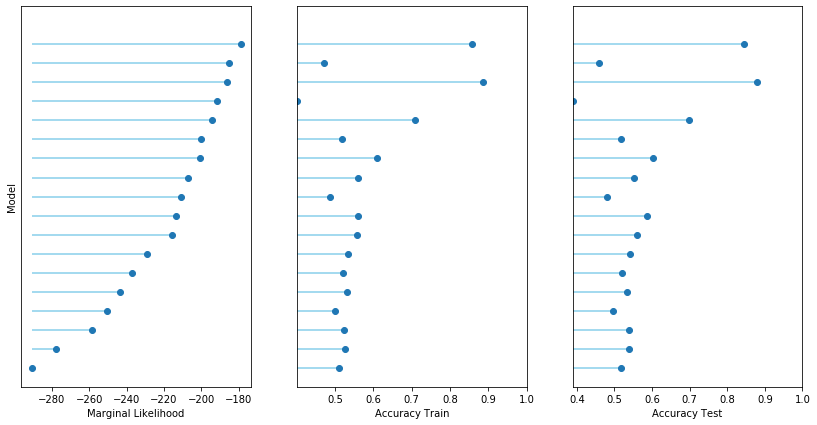

In [105]:
ordered_df = rrLyrae.sort_values(by=['Marg. Likelihood'], ascending=True)
my_range=range(1,len(rrLyrae.index)+1)
plt.figure(figsize=(14,7)) 
plt.subplot(1, 3, 1)
SMALL_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['Marg. Likelihood'].min(), xmax=ordered_df['Marg. Likelihood'], color='skyblue')
plt.plot(ordered_df['Marg. Likelihood'], my_range, "o")
plt.xlabel('Marginal Likelihood')
plt.ylabel('Model')
plt.ylim(0, len(rrLyrae.index)+2)
plt.yticks([])

plt.subplot(1, 3, 2)
plt.hlines(y=my_range, xmin=ordered_df['accTrain'].min(), xmax=ordered_df['accTrain'], color='skyblue')
plt.plot(ordered_df['accTrain'], my_range, "o")
plt.xlabel('Accuracy Train')
#plt.ylabel('Model')
plt.ylim(0, len(rrLyrae.index)+2)
plt.yticks([])
plt.xlim(ordered_df['accTrain'].min(), 1)

plt.subplot(1, 3, 3)
plt.hlines(y=my_range, xmin=ordered_df['accTest'].min(), xmax=ordered_df['accTest'], color='skyblue')
plt.plot(ordered_df['accTest'], my_range, "o")
plt.xlabel('Accuracy Test')
plt.ylim(0, len(rrLyrae.index)+2)
plt.xlim(ordered_df['accTest'].min(), 1)
plt.yticks([])
plt.show()

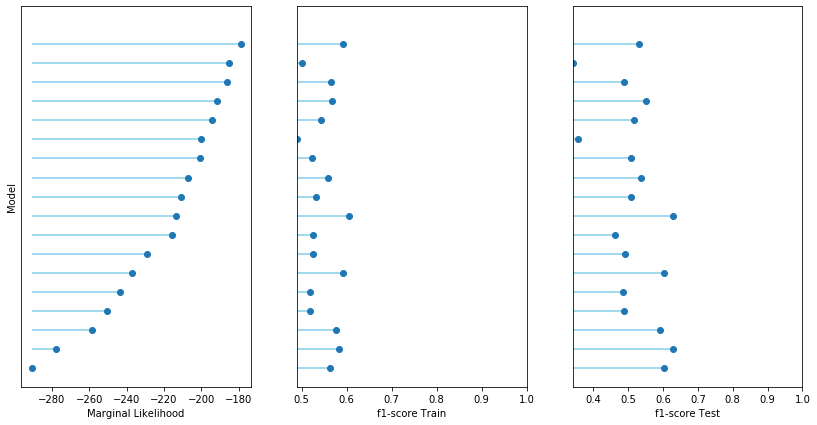

In [106]:
ordered_df = rrLyrae.sort_values(by=['Marg. Likelihood'], ascending=True)
my_range=range(1,len(rrLyrae.index)+1)
plt.figure(figsize=(14,7)) 
plt.subplot(1, 3, 1)
SMALL_SIZE = 10
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['Marg. Likelihood'].min(), xmax=ordered_df['Marg. Likelihood'], color='skyblue')
plt.plot(ordered_df['Marg. Likelihood'], my_range, "o")
plt.xlabel('Marginal Likelihood')
plt.ylabel('Model')
plt.ylim(0, len(rrLyrae.index)+2)
plt.yticks([])

plt.subplot(1, 3, 2)
plt.hlines(y=my_range, xmin=ordered_df['f1Train'].min(), xmax=ordered_df['f1Train'], color='skyblue')
plt.plot(ordered_df['f1Train'], my_range, "o")
plt.xlabel('f1-score Train')
#plt.ylabel('Model')
plt.ylim(0, len(rrLyrae.index)+2)
plt.yticks([])
plt.xlim(ordered_df['f1Train'].min(), 1)

plt.subplot(1, 3, 3)
plt.hlines(y=my_range, xmin=ordered_df['f1Test'].min(), xmax=ordered_df['f1Test'], color='skyblue')
plt.plot(ordered_df['f1Test'], my_range, "o")
plt.xlabel('f1-score Test')
plt.ylim(0, len(rrLyrae.index)+2)
plt.xlim(ordered_df['f1Test'].min(), 1)
plt.yticks([])
plt.show()

In [107]:
rrLyrae.sort_values(by=['accTrain'], ascending=False).head()

,pol,components,Marg. Likelihood,size,col1,test,accTrain,f1Train,accTest,f1Test,Rank,RankTestML
5,1,4,-186.499232,10000,False,"{'Intercept': 1.0000036886144232, 'col0': 1.00...",0.8850,0.564472,0.879707,0.487482,3.0,1.0
2,1,2,-179.115087,10000,False,"{'Intercept': 1.0000004745915991, 'col0': 0.99...",0.8573,0.590917,0.844367,0.530548,1.0,2.0
8,1,6,-194.128263,10000,False,"{'Intercept': 0.9999985804666692, 'col0': 1.00...",0.7076,0.543546,0.697371,0.517575,5.0,3.0
11,1,8,-200.924493,10000,False,"{'Intercept': 1.0000175361697277, 'col0': 1.00...",0.6092,0.523528,0.602522,0.509265,7.0,4.0
41,3,4,-213.373113,10000,False,"{'Intercept': 1.000055910408262, 'col0': 1.000...",0.5594,0.604891,0.585279,0.629156,10.0,5.0


In [108]:
rrLyrae.sort_values(by=['f1Train'], ascending=False).head()

,pol,components,Marg. Likelihood,size,col1,test,accTrain,f1Train,accTest,f1Test,Rank,RankTestML
41,3,4,-213.373113,10000,False,"{'Intercept': 1.000055910408262, 'col0': 1.000...",0.5594,0.604891,0.585279,0.629156,10.0,5.0
44,3,6,-237.126953,10000,False,"{'Intercept': 1.0000116216768022, 'col0': 1.00...",0.5198,0.592873,0.520088,0.601573,13.0,12.0
2,1,2,-179.115087,10000,False,"{'Intercept': 1.0000004745915991, 'col0': 0.99...",0.8573,0.590917,0.844367,0.530548,1.0,2.0
50,3,10,-277.984405,10000,False,"{'Intercept': 1.0000713804463217, 'col0': 1.00...",0.5262,0.581869,0.538297,0.628926,17.0,9.0
47,3,8,-258.555660,10000,False,"{'Intercept': 1.0000021557356376, 'col0': 1.00...",0.5239,0.575825,0.537453,0.590296,16.0,10.0


In [109]:
#rrLyrae.sort_values(by=['map_logp'], ascending=False).head()

In [110]:
def surface_plot(X,Y,Z,**kwargs):
    """ WRITE DOCUMENTATION """
    xlabel, ylabel, zlabel, title = kwargs.get('xlabel',""), kwargs.get('ylabel',""), kwargs.get('zlabel',""), kwargs.get('title',"")
    fig = plt.figure(figsize=(12,8))
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(111, projection='3d')
    SMALL_SIZE = 6
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    #X, Y = np.meshgrid(X, Y)
    bar = kwargs['bar']
    if bar == True:
        ax.bar(Y, -Z, zs=X, zdir='x')
    else: 
        mlMax = Z.max()
        hiddenMax = Y.iloc[Z.idxmax()]
        componentMax = X.iloc[Z.idxmax()]
        Y.drop(Z.idxmax())
        X.drop(Z.idxmax())
        Z.drop(Z.idxmax())
        ax.scatter(componentMax,hiddenMax, mlMax, color='red',linewidth=5, marker='o')
        ax.scatter(X,Y,Z,linewidth=3, marker='o')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    plt.show()
    plt.close()

In [111]:
#rrLyraeNormal.Components

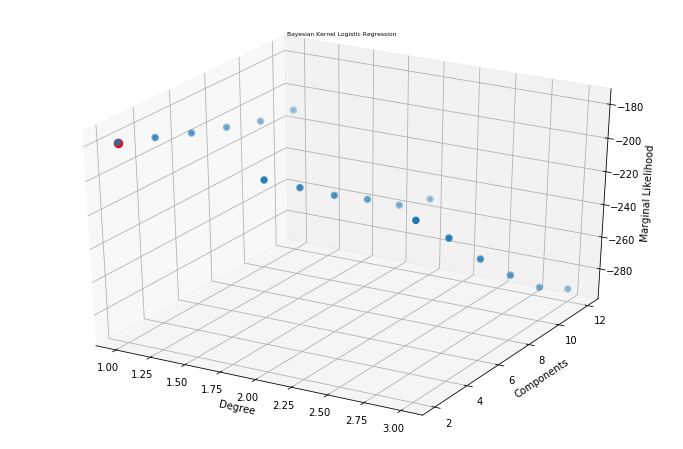

In [113]:
#rrLyrae = Data[Data['class']==StarClass]
#rrLyraeNormal = rrLyrae[rrLyrae['Modified Prior']=='normal']

rrLyraeNormal = rrLyrae.reset_index()
surface_plot(rrLyraeNormal.pol,rrLyraeNormal.components, rrLyraeNormal['Marg. Likelihood'],**kwargs)

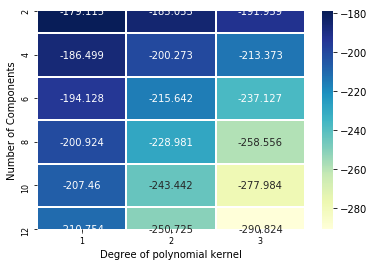

In [115]:
import seaborn as sns
sizePlot = 10
rc={'axes.labelsize': sizePlot, 'font.size': sizePlot, 'legend.fontsize':sizePlot, 'axes.titlesize': sizePlot, 'axes.labelsize': sizePlot, 
    'xtick.labelsize': sizePlot,  'ytick.labelsize': sizePlot}
plt.rcParams.update(**rc)


result = rrLyraeNormal.pivot(index='components', columns='pol', values='Marg. Likelihood')
b= sns.heatmap(result, annot=True,annot_kws={"size": sizePlot}, fmt="g", cmap="YlGnBu", linewidths=1)
b.set_xlabel('Degree of polynomial kernel',fontsize=sizePlot)
b.set_ylabel('Number of Components',fontsize=sizePlot)
#b.set_style("ticks", {"xtick.major.size": sizePlot, "ytick.major.size": sizePlot})
b.tick_params(labelsize=8)




In [ ]:
result

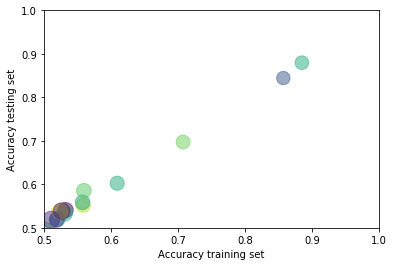

In [117]:
#Data = Data[Data['class']==StarClass]
dataNormal = Data
colors = np.random.rand(dataNormal.shape[0])
plt.xlim((0.5,1))
plt.ylim((0.5,1))
plt.xlabel('Accuracy training set')
plt.ylabel('Accuracy testing set')
plt.scatter(dataNormal['accTrain'], dataNormal['accTest'], s=-dataNormal['Marg. Likelihood'], c=colors, alpha=0.5)
plt.show()

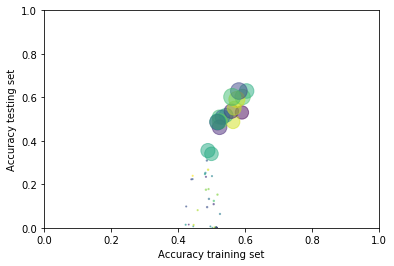

In [119]:
#Data = Data[Data['class']==StarClass]
#print(Data)

colors = np.random.rand(dataNormal.shape[0])
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Accuracy training set')
plt.ylabel('Accuracy testing set')
plt.scatter(dataNormal['f1Train'], dataNormal['f1Test'], s=-dataNormal['Marg. Likelihood'], c=colors, alpha=0.5)
plt.show()

In [41]:
rrLyraeNormal = dataNormal[dataNormal['pol']==1]

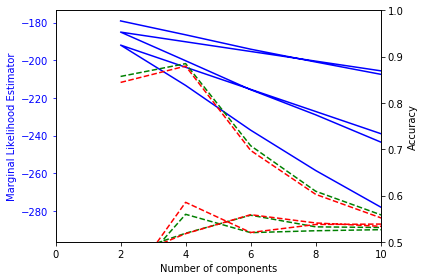

In [121]:
fig, ax1 = plt.subplots()
#t = np.arange(0.01, 10.0, 0.01)
#s1 = np.exp(t)
ax1.plot(rrLyraeNormal.components, rrLyraeNormal['Marg. Likelihood'], 'b-')
ax1.set_xlabel('Number of components')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Marginal Likelihood Estimator', color='b')
ax1.tick_params('y', colors='b')
#ax1.set_ylim(-700,-500)
ax2 = ax1.twinx()
ax2.set_ylim(0.5,1)
ax2.set_xlim(0,10)
#s2 = np.sin(2 * np.pi * t)
ax2.plot(rrLyraeNormal.components, rrLyraeNormal['accTrain'], 'g--', label = 'Acc Train')
ax2.plot(rrLyraeNormal.components, rrLyraeNormal['accTest'], 'r--', label = 'Acc Test')
#ax2.plot(rrLyraeNormal.Components, rrLyraeNormal['f1Test'], 'r-^', label = 'F1 Test')
#ax2.plot(rrLyraeNormal.Components, rrLyraeNormal['f1Train'], 'g-^', label = 'F1 Train')
ax2.set_ylabel('Accuracy', color='black')
ax2.tick_params('y', colors='black')
#ax2.ylim(0.6, 1)
#legend = ax2.legend(loc='lower right', shadow=True)
#legend = ax1.legend(loc='lower left', shadow=True)
fig.tight_layout()
plt.show()